<a href="https://colab.research.google.com/github/flash-jaehyun/double_pendulum/blob/main/modified_doublependulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Double Pendulum
> The most beautiful chaos

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

> youtube: https://youtu.be/-76LN_Kph7A

## Introduction

The double pendulum is one of the most famous examples of chaos. Enjoy making your own animations!

## The code

comment the lines below if you want interactive mode, i.e., if you want to see the animation in real time.

In [ ]:
import matplotlib
matplotlib.use('Agg')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.integrate import ode

define equations of motion and other functions

In [ ]:
def equations(t, y, args):
    """ the equations for the double pendulum """
    x1 = y[0] # x1 = theta1, angle
    x2 = y[1] # x2 = theta2, angle
    p1 = y[2] # p1 = omega1, angular velocity
    p2 = y[3] # p2 = omega2, angular velocity
    l1,l2,m1,m2,g = args
    x1_eq = p1
    x2_eq = p2
    p1_eq = -((g*(2*m1+m2)*np.sin(x1)+m2*(g*np.sin(x1-2*x2)+2*(l2*p2**2+l1*p1**2*np.cos(x1-x2))*np.sin(x1-x2)))/(2*l1*(m1+m2-m2*(np.cos(x1-x2))**2)))
    p2_eq = ((l1*(m1+m2)*p1**2+g*(m1+m2)*np.cos(x1)+l2*m2*p2**2*np.cos(x1-x2))*np.sin(x1-x2))/(l2*(m1+m2-m2*(np.cos(x1-x2))**2))
    return [x1_eq, x2_eq, p1_eq, p2_eq]

def calculate_trajectory(args,time,y0):
    """ uses scipy's ode itegrator to simulate the equations """
    t0,t1,dt = time
    r = ode(equations).set_integrator('dopri5')
    r.set_initial_value(y0, t0).set_f_params(args)
    data=[[t0, y0[0], y0[1], y0[2], y0[3] ]]
    while r.successful() and r.t < t1:
        r.integrate(r.t+dt)
        data.append([r.t, r.y[0], r.y[1], r.y[2], r.y[3] ])
    return np.array(data)

def from_angle_to_xy(args,angles):
    """ converts angles into xy positions """
    l1,l2,m1,m2,g = args
    time,theta1,theta2 = angles.T
    x1 =  l1*np.sin(theta1)
    y1 = -l1*np.cos(theta1)
    x2 =  l2*np.sin(theta2) + x1
    y2 = -l2*np.cos(theta2) + y1
    return np.array([time,x1,y1,x2,y2]).T

parameters

In [ ]:
l1 = 0.5 # length of arms
l2 = 0.5
m1 = 1.0 # mass of the pendulum
m2 = 1.0
g  = 10.0 # acceleration of gravity
args = [l1,l2,m1,m2,g]
fps = 80
total_time = 5 # seconds
time = [0.0,total_time,1.0/fps] # start, finish, dt
ic   = [np.pi*0.65, np.pi*1.1, 0.0, 0.0]

here the magic happens

In [ ]:
d = calculate_trajectory(args,time,ic)
data_TXY = from_angle_to_xy(args,d[:,:3])

Let's plot stuff, and make a nice movie.  
Requrement: ffmpeg

In [ ]:
pip install latex

  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7605 sha256=964a18cc4d89ff0abfaec7e1efd99106fb2ccf2bd6d4d94f5ad3b20ca5ffb84a
  Stored in directory: /root/.cache/pip/wheels/57/d6/11/5d5718227890d9e479b6137cb406410c37a0b84b2ab35b872b
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7246 sha256=9cc18ac84065f4e4b5ca634ce3c6b47d75833004a6e4765e83e1472eb482e88e
  Stored in directory: /root/.cache/pip/wheels/28/76/4b/7db27e02c1de4d2181559d108fcdfed1680ff7d3534553d460
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2782 sha256=0a6e3e3ca7d4a0e247678d5f18c25fdd12d2f62124e2bad94a29dde6f09f4e86
  Stored in directory: /root/.cache/pip/wheels/4c/c0/ce/5a47f35186acbe73e38811df30daaf798c81a7599bb2d5995a
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2213 sha256=03320e18fa81e1d78102d3e40277a9022e3109798e8bd8386140baa05188cf7b
  Stored in directory: /root/.cache/pip/wheels/7a/f1/d7/124b54c21a9ba4973bc60fc

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

In [ ]:
!pip install ffmpeg-python

In [ ]:
!sudo apt-get install dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  ghostscript gsfonts
Suggested packages:
  ghostscript-x
The following NEW packages will be installed:
  dvipng ghostscript gsfonts
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 3,250 kB of archives.
After this operation, 4,947 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 ghostscript amd64 9.26~dfsg+0-0ubuntu0.18.04.14 [51.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dvipng amd64 1.15-1 [78.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 gsfonts all 1:8.11+urwcyr1.0.7~pre44-4.4 [3,120 kB]
Fetched 3,250 kB in 1s (3,869 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.p

In [ ]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=e447dec4f48948ca419f950b5e0fa158ede40fd5890f6526754f32706494fb33
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


Setting rcParams['ps.usedistiller'] to 'xpdf' requires xpdf.


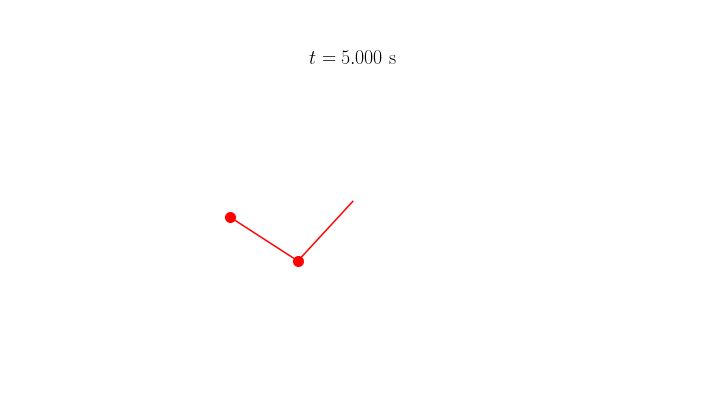

In [ ]:
make_movie=True
params = {'backend': 'ps',
          'font.size': 20,
          'font.family':'serif',
          'font.serif':['Computer Modern Roman'], # Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          }
plt.rcParams.update(params)
plt.ion()
fig = plt.figure(figsize=(9.6,5.4),dpi=100) # 1920x1080
fig.subplots_adjust(left=0, right=1, top=1, bottom=0,hspace=0.02,wspace=0.02)
ax = fig.add_subplot(111)
ax.axis('off') # no frame

def plot_last_seconds(data,index):
    """ Plots a line with the trajectory of the tip of pendulum 2 (x2,y2)
    """
    how_long = 1.0 # seconds
    n = int(how_long/time[2])
    to_plot = data[:index,:]
    if index < n:
        prepend =  np.tile(data[0],(n-index,1))
        to_plot = np.vstack([prepend,to_plot])
        index = n
    colormap = plt.cm.Greys_r
    colors = [colormap(i) for i in np.linspace(0.0, 1.0, n-1)]
    plots = []
    for j in np.arange(n-1):
        p, = ax.plot(to_plot[index-j-1:index-j+1,3],to_plot[index-j-1:index-j+1,4],
                color=colors[j], zorder=-1)
        plots.append(p)
    return plots

# "plot" returns a tuple of line objects, thus the comma
t,x1,y1,x2,y2 = data_TXY[0]
line1, = ax.plot([0.0,x1], [0.0,y1], 'r-')
line2, = ax.plot([x1,x2], [y1,y2], 'r-')
circ1, = ax.plot([x1], [y1], 'ro',markersize=10)
circ2, = ax.plot([x2], [y2], 'ro',markersize=10)
sizeY = 1.2
ax.axis([-sizeY*16/9,sizeY*16/9,-sizeY,sizeY])

frame_names = []
tex=ax.text(0.0,0.85,'',ha="center")

for i,v in enumerate(data_TXY):
    t,x1,y1,x2,y2 = v
    # print("t={:.2f}".format(t)) # you might want to know how things are going...
    line1.set_data([0.0,x1],[0.0,y1])
    line2.set_data([x1,x2],[y1,y2])
    circ1.set_data([x1],[y1])
    circ2.set_data([x2],[y2])
    
    # plot_last_seconds considerably slows down the simulation,
    # but makes it much prettier...
    pls = plot_last_seconds(data_TXY,i+1)
    tex.set_text(r"$t={:.3f}$ s".format(t))
    fig.canvas.draw()
    if make_movie:
        fname = "_tmp{:05d}.png".format(i)
        frame_names.append(fname)
        fig.savefig(fname,bbox_inches='tight')
    for k in pls:
        k.remove()

if make_movie:
    frames = "_tmp%5d.png"
    frames = "_tmp%5d.png"
    movie_command = "ffmpeg -y -r {:} -i {:} double.mp4".format(fps,frames)
    os.system(movie_command)
    
    for fname in frame_names:
        os.remove(fname)